In [1]:
!pip3 install pandas numpy seaborn kaggle matplotlib scikit-learn

  Using cached numpy-2.3.3-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached kaggle-1.7.4.5-py3-none-any.whl.metadata (16 kB)
  Using cached matplotlib-3.10.6-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached bleach-6.2.0-py3-none-any.whl.metadata (30 kB)
  Using cached charset_normalizer-3.4.3-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached protobuf-6.32.1-cp39-abi3-manylinux2014_x86_64.whl.metadata (593 bytes)
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached setuptools-80.9.0-py3-n

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler

# Obtener los datos

In [58]:
from pathlib import Path
import shutil

# Cargar el archivo kaggle.json para autenticación con la API de Kaggle

# Suponiendo que kaggle.json está en el directorio actual
kaggle_json = Path('kaggle.json')
kaggle_dir = Path.home() / '.kaggle'
kaggle_dir.mkdir(exist_ok=True)
shutil.copy(str(kaggle_json), str(kaggle_dir / 'kaggle.json'))

# Establecer permisos adecuados
os.chmod(str(kaggle_dir / 'kaggle.json'), 0o600)

In [59]:
!kaggle datasets download -d neuromusic/avocado-prices -p ./ --unzip

Dataset URL: https://www.kaggle.com/datasets/neuromusic/avocado-prices
License(s): ODbL-1.0
  0%|                                                | 0.00/629k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 629k/629k [00:00<00:00, 2.54GB/s]


In [60]:
df = pd.read_csv("./avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [62]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Cambio de columnas 4046, 4225 7 4770 por small_hass_sold, large_hass_sold y xlarge_hass_sold respectivamente para una mejor descripcion del campo

In [63]:
df = df.rename(columns={
    '4046': 'small_hass_sold',
    '4225': 'large_hass_sold',
    '4770': 'xlarge_hass_sold'
})

Estandarizacion de los nombres de los campos a snake_case

In [64]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('-', '_')
      .str.replace(r'[^a-z0-9_]', '', regex=True)
)


Eliminar columna unnamed ya que no aporta gran valor al dataset

In [65]:
df = df.drop(columns=['unnamed_0'])

In [66]:
df.columns

Index(['date', 'averageprice', 'total_volume', 'small_hass_sold',
       'large_hass_sold', 'xlarge_hass_sold', 'total_bags', 'small_bags',
       'large_bags', 'xlarge_bags', 'type', 'year', 'region'],
      dtype='object')

# Proceso de analisis descriptivo

## Verficar datos duplicados

In [67]:
duplicated_rows = df[df.duplicated()]
duplicated_rows

,date,averageprice,total_volume,small_hass_sold,large_hass_sold,xlarge_hass_sold,total_bags,small_bags,large_bags,xlarge_bags,type,year,region


In [68]:
duplicated_rows = df[df.duplicated(subset=[
    'date',
    'averageprice', 
    'total_volume', 
    'small_hass_sold', 
    'large_hass_sold', 
    'xlarge_hass_sold',
    'total_bags',
    'small_bags',
    'large_bags',
    'xlarge_bags',
    'type',
    'year',
    'region'
])]
duplicated_rows

,date,averageprice,total_volume,small_hass_sold,large_hass_sold,xlarge_hass_sold,total_bags,small_bags,large_bags,xlarge_bags,type,year,region


## Procesar datos

### Cambiar representacion de la fecha

In [69]:
df['date'] = pd.to_datetime(df['date'])

df['date_ts'] = (df['date'].view('int64') // 10**9 // 86400).astype('int64')  # timestamp en días
# df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head()

/tmp/ipykernel_15733/1717185007.py:3: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df['date_ts'] = (df['date'].view('int64') // 10**9 // 86400).astype('int64')  # timestamp en días


,date,averageprice,total_volume,small_hass_sold,large_hass_sold,xlarge_hass_sold,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,date_ts,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,16796,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,16789,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,16782,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,16775,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,16768,11


## Estandarizacion de datos

In [70]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df_scaled.head()

,date,averageprice,total_volume,small_hass_sold,large_hass_sold,xlarge_hass_sold,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,date_ts,month
0,2015-12-27,-0.188689,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,conventional,-1.221282,Albany,-0.676360,12
1,2015-12-20,-0.139020,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,conventional,-1.221282,Albany,-0.696857,12
2,2015-12-13,-1.182069,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,conventional,-1.221282,Albany,-0.717355,12
3,2015-12-06,-0.809551,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,conventional,-1.221282,Albany,-0.737853,12
4,2015-11-29,-0.312861,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,conventional,-1.221282,Albany,-0.758350,11


### Cantidad total de aguacates vendidos por mes

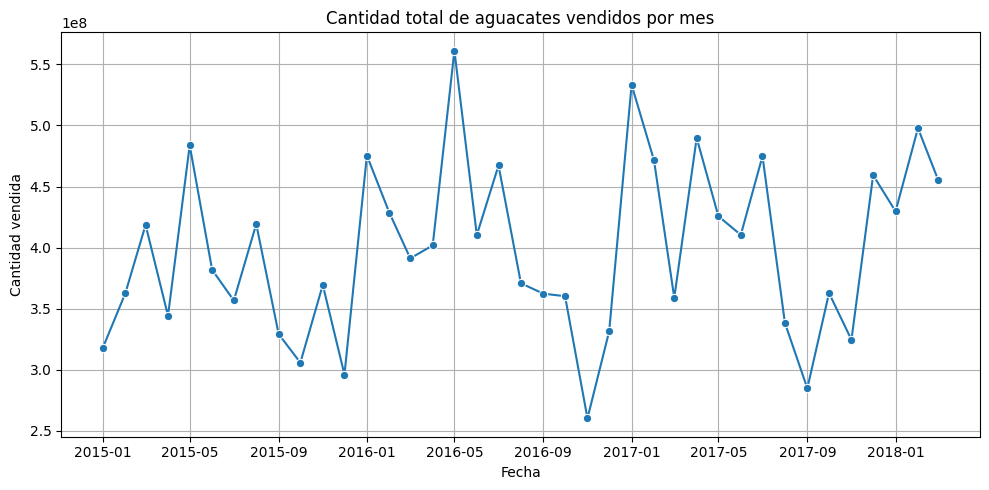

In [72]:
monthly_sales = df.groupby(['year', 'month'])['total_volume'].sum().reset_index()
monthly_sales['date'] = pd.to_datetime(monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str) + '-01')

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='date', y='total_volume', marker='o')
plt.title('Cantidad total de aguacates vendidos por mes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad vendida')
plt.grid(True)
plt.tight_layout()
plt.show()

### Cantidad total vendida por tipo de aguacate

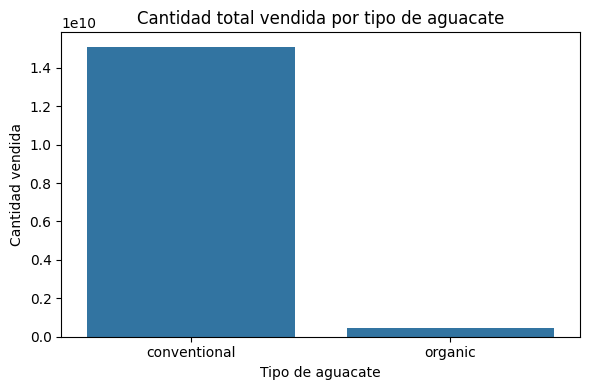

In [74]:
type_sales = df.groupby('type')['total_volume'].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=type_sales, x='type', y='total_volume')
plt.title('Cantidad total vendida por tipo de aguacate')
plt.xlabel('Tipo de aguacate')
plt.ylabel('Cantidad vendida')
plt.tight_layout()
plt.show()

### Cantidad total vendida por región
Vamos a quitar la region totalUS, ya que con esta region se distorsiona la comparacion ya que es la suma de todas las regiones de Estados Unidos

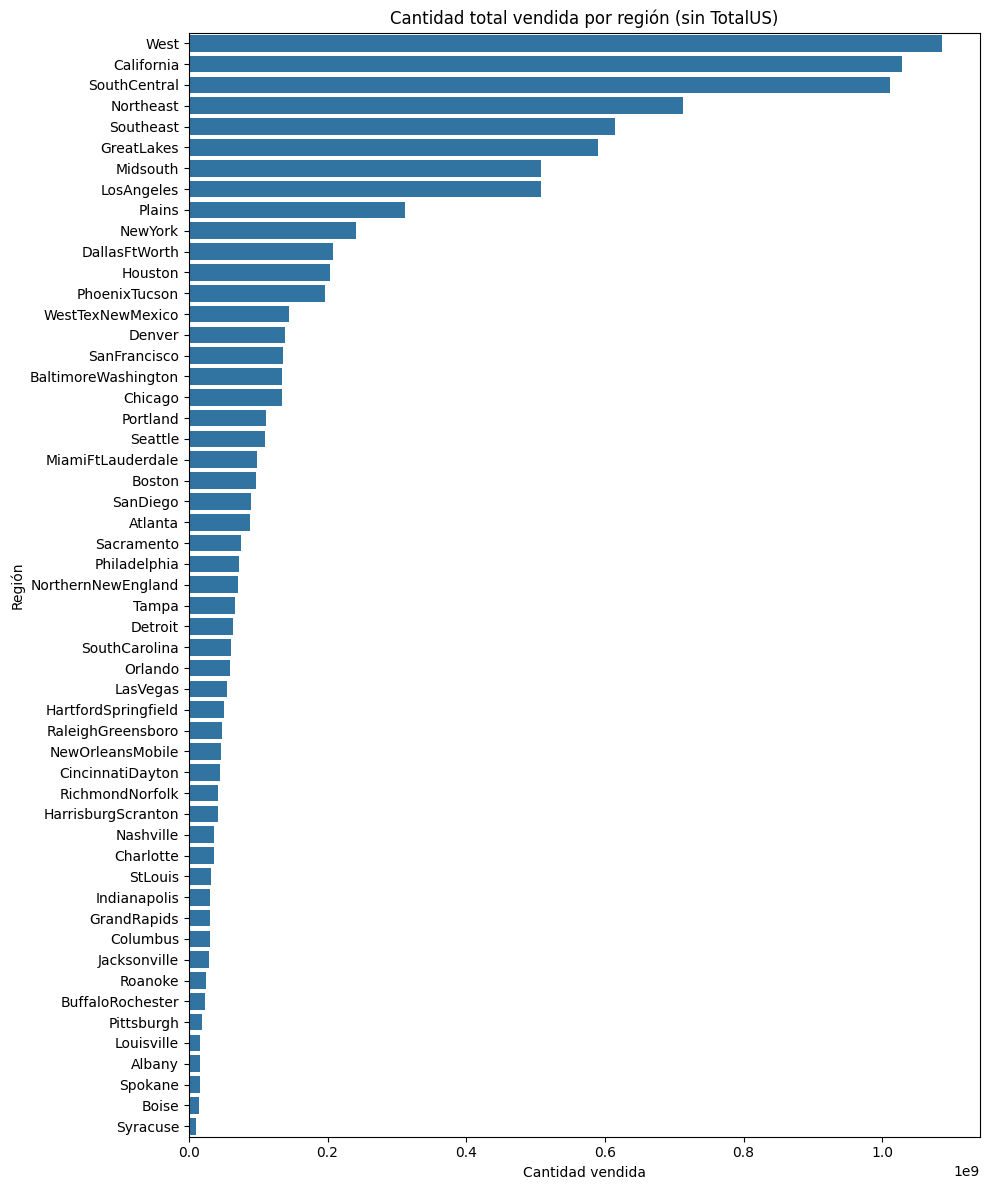

In [ ]:
region_sales = (
    df[~df['region'].isin(['TotalUS', 'Total U.S.'])]
    .groupby('region')['total_volume']
    .sum()
    .reset_index()
    .sort_values('total_volume', ascending=False)
)

plt.figure(figsize=(10, 12))
sns.barplot(data=region_sales, y='region', x='total_volume')
plt.title('Cantidad total vendida por región (sin TotalUS)')
plt.xlabel('Cantidad vendida')
plt.ylabel('Región')
plt.tight_layout()
plt.show()

### Evolución del precio promedio del aguacate a lo largo del tiempo

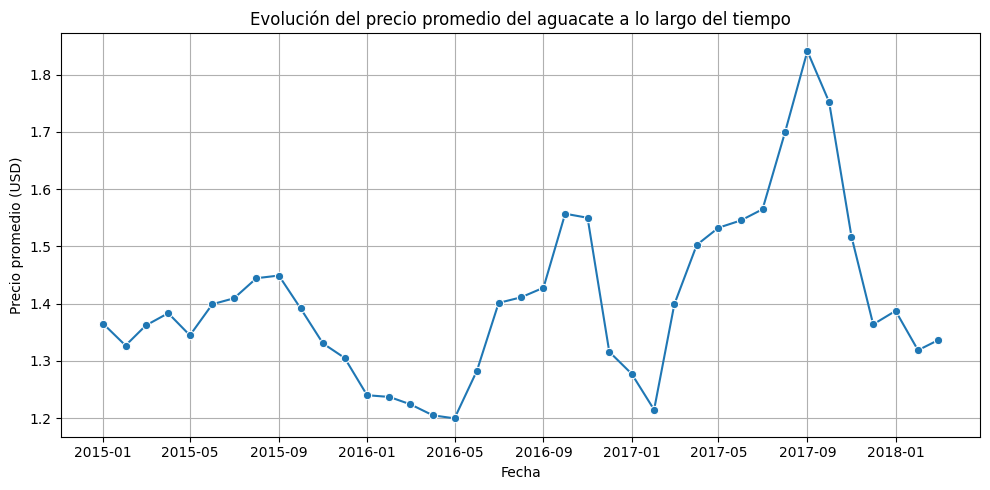

In [75]:
price_trend = df.groupby(['year', 'month'])['averageprice'].mean().reset_index()
price_trend['date'] = pd.to_datetime(price_trend['year'].astype(str) + '-' + price_trend['month'].astype(str) + '-01')

plt.figure(figsize=(10, 5))
sns.lineplot(data=price_trend, x='date', y='averageprice', marker='o')
plt.title('Evolución del precio promedio del aguacate a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio promedio (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Distribución del precio promedio por tipo de aguacate

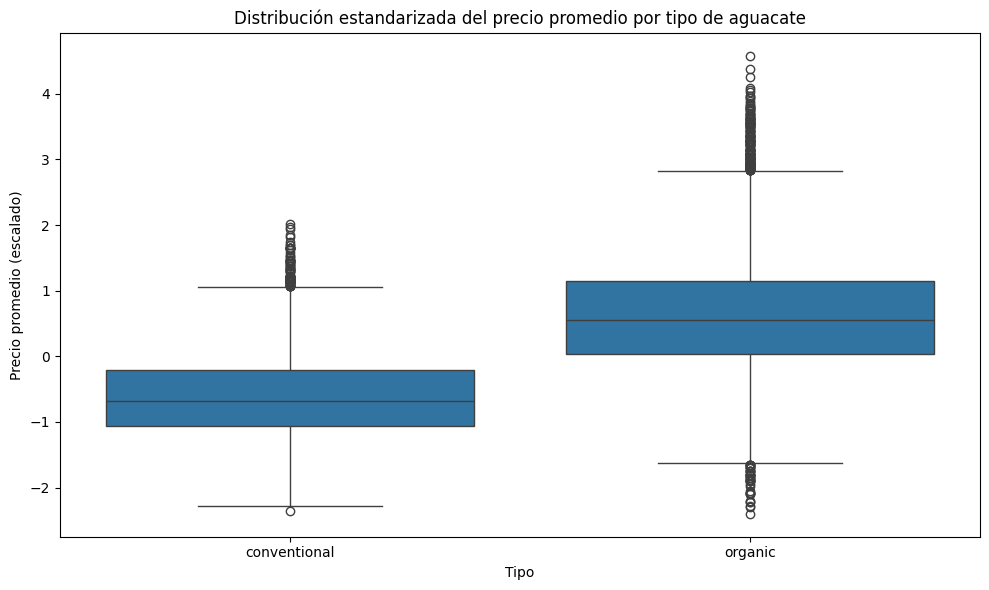

In [89]:
# Crear copia del DataFrame
df_scaled = df.copy()

# Estandarizar la variable de precio
scaler = StandardScaler()
df_scaled['average_price_scaled'] = scaler.fit_transform(df[['averageprice']])

# Boxplot con precio estandarizado
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_scaled, x='type', y='average_price_scaled')
plt.title('Distribución estandarizada del precio promedio por tipo de aguacate')
plt.xlabel('Tipo')
plt.ylabel('Precio promedio (escalado)')
plt.tight_layout()
plt.show()

### Precio promedio del aguacate por región (sin TotalUS)

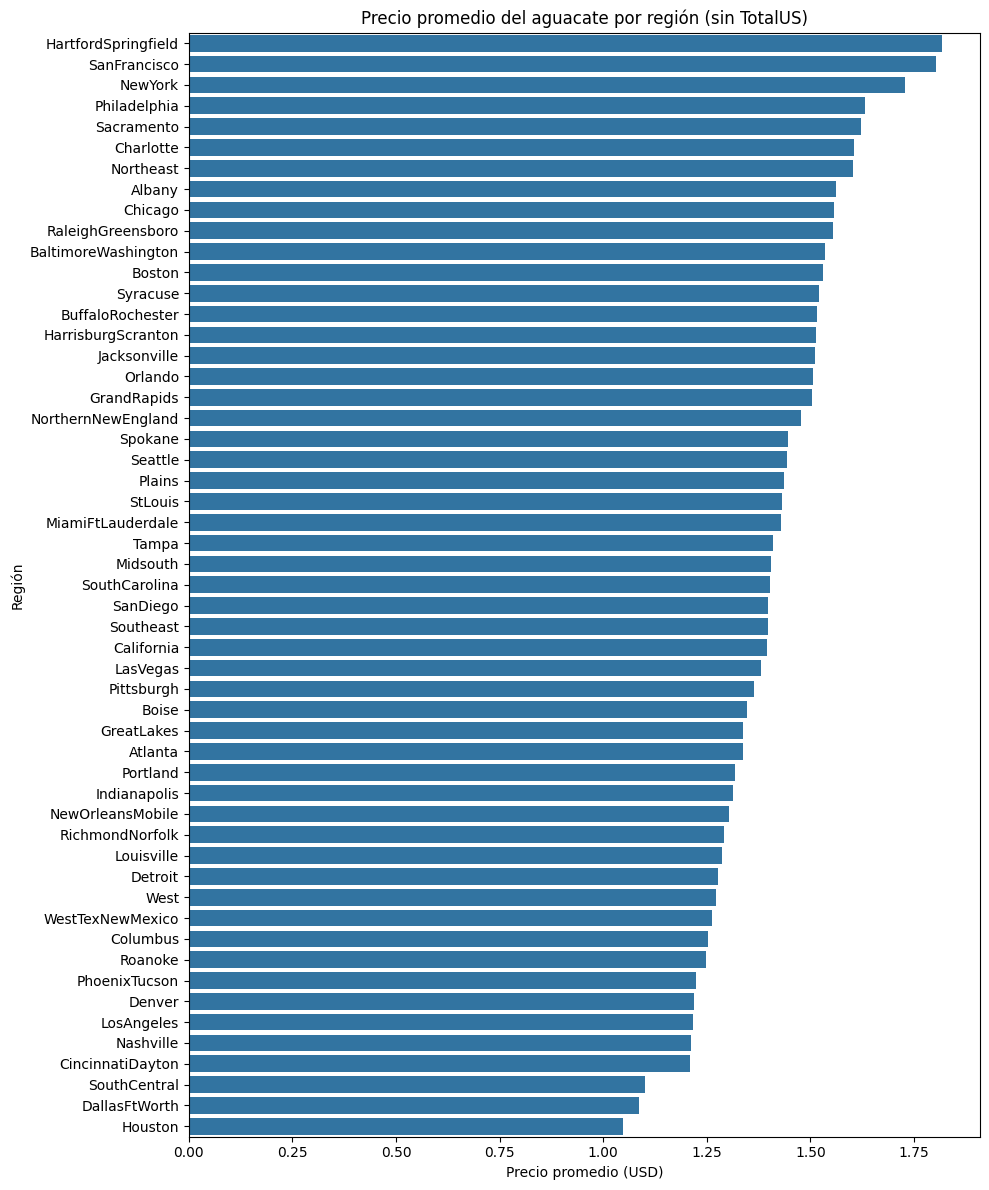

In [80]:
region_price = (
    df[~df['region'].isin(['TotalUS', 'Total U.S.'])]
    .groupby('region')['averageprice']
    .mean()
    .reset_index()
    .sort_values('averageprice', ascending=False)
)

plt.figure(figsize=(10, 12))
sns.barplot(data=region_price, y='region', x='averageprice')
plt.title('Precio promedio del aguacate por región (sin TotalUS)')
plt.xlabel('Precio promedio (USD)')
plt.ylabel('Región')
plt.tight_layout()
plt.show()

### Relación entre precio promedio y cantidad vendida
Comprueba si hay correlación entre precio y cantidad (por ejemplo, si al subir el precio, bajan las ventas).

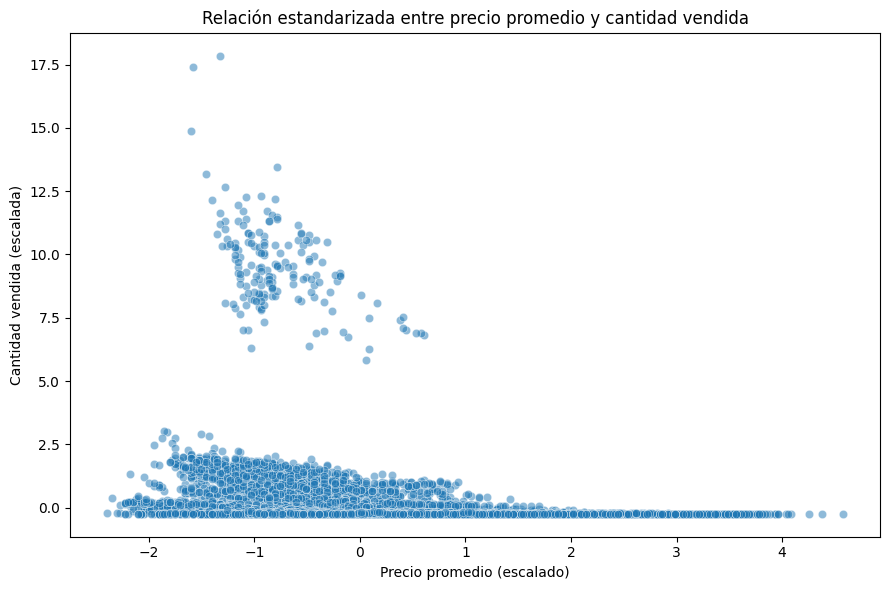

In [87]:
df_scaled = df.copy()

# Estandarizar las columnas relevantes
scaler = StandardScaler()
df_scaled[['average_price_scaled', 'total_volume_scaled']] = scaler.fit_transform(df[['averageprice', 'total_volume']])

# Gráfica con datos estandarizados
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df_scaled, x='average_price_scaled', y='total_volume_scaled', alpha=0.5)
plt.title('Relación estandarizada entre precio promedio y cantidad vendida')
plt.xlabel('Precio promedio (escalado)')
plt.ylabel('Cantidad vendida (escalada)')
plt.tight_layout()
plt.show()

### Mapa de calor de correlaciones entre variables numéricas

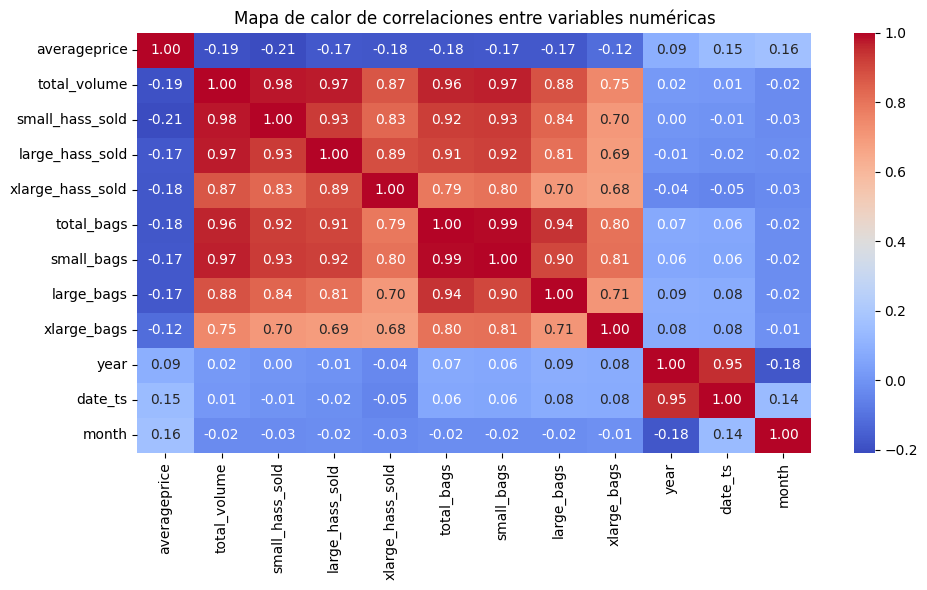

In [85]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlaciones entre variables numéricas')
plt.tight_layout()
plt.show()

### Precio promedio del aguacate por mes del año

/tmp/ipykernel_15733/323345891.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='month', y='averageprice', estimator='mean', ci=None, marker='o')


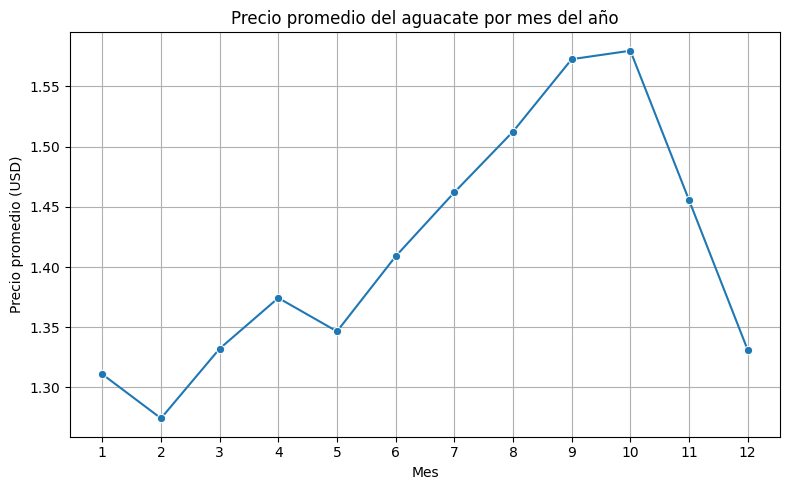

In [90]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='month', y='averageprice', estimator='mean', ci=None, marker='o')
plt.title('Precio promedio del aguacate por mes del año')
plt.xlabel('Mes')
plt.ylabel('Precio promedio (USD)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

### Distribución del precio promedio del aguacate

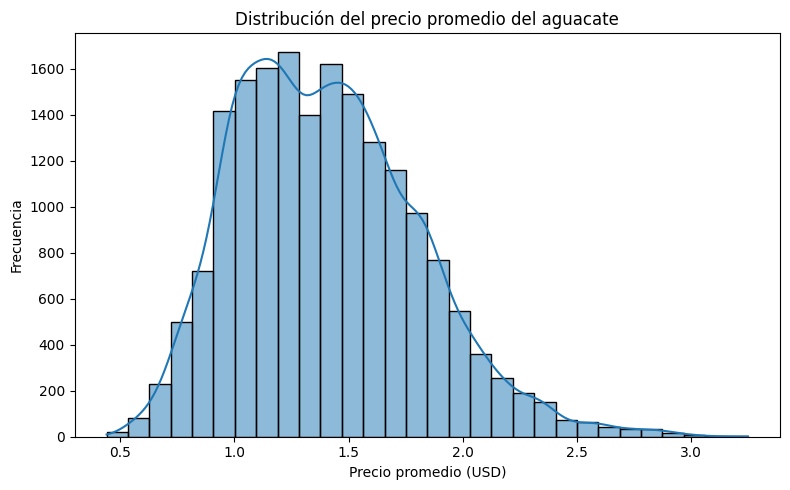

In [92]:
plt.figure(figsize=(8, 5))
sns.histplot(df['averageprice'], bins=30, kde=True)
plt.title('Distribución del precio promedio del aguacate')
plt.xlabel('Precio promedio (USD)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### Relación entre precio y cantidad vendida por tipo de aguacate

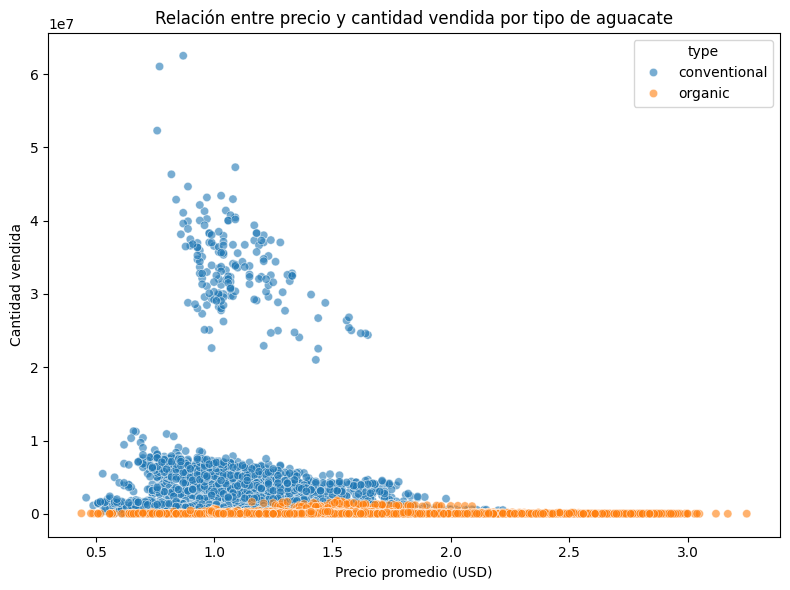

In [95]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='averageprice', y='total_volume', hue='type', alpha=0.6)
plt.title('Relación entre precio y cantidad vendida por tipo de aguacate')
plt.xlabel('Precio promedio (USD)')
plt.ylabel('Cantidad vendida')
plt.tight_layout()
plt.show()